In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\vedan\Downloads\train(4).csv")
test = pd.read_csv(r"C:\Users\vedan\Downloads\test(4).csv")

In [3]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train['Deck'] = train['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

train['Side']= train['Cabin'].str[-1]
test['Side']= test['Cabin'].str[-1]

train.drop(columns = 'Cabin',inplace = True)
test.drop(columns = 'Cabin',inplace = True)

In [6]:
train['Group'] = train['PassengerId'].str.split('_').str[0]
test['Group'] = test['PassengerId'].str.split('_').str[0]

train.set_index('PassengerId',inplace = True)
test.set_index('PassengerId',inplace = True)

In [7]:
train.drop(columns = 'Name',inplace = True)
test.drop(columns = 'Name',inplace = True)

In [8]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    category_target_rate = train.groupby(col)['Transported'].mean()
    print(category_target_rate )

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64
CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64
Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64
VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64
Deck
A    0.496094
B    0.734275
C    0.680054
D    0.433054
E    0.357306
F    0.439871
G    0.516217
T    0.200000
Name: Transported, dtype: float64
Side
P    0.451260
S    0.555037
Name: Transported, dtype: float64
Group
0001    0.000000
0002    1.000000
0003    0.000000
0004    1.000000
0005    1.000000
          ...   
9275    0.666667
9276    0.000000
9278    0.000000
9279    1.000000
9280    0.500000
Name: Transported, Length: 6217, dtype: float64


In [9]:
cols_luxury = ['Spa', 'VRDeck']
cols_essential = ['FoodCourt', 'ShoppingMall']

train['LuxurySpending'] = train[cols_luxury].sum(axis=1)
train['EssentialSpending'] = train[cols_essential].sum(axis=1)

test['LuxurySpending'] = test[cols_luxury].sum(axis=1)
test['EssentialSpending'] = test[cols_essential].sum(axis=1)

train.drop(columns=cols_luxury + cols_essential, inplace=True)
test.drop(columns=cols_luxury + cols_essential, inplace=True)

In [22]:
test['Groupnum'] = test.groupby('Group')['Group'].transform('count').astype(float)
train['Groupnum'] = train.groupby('Group')['Group'].transform('count').astype(float)

In [23]:
test['Groupnum'].dtype

dtype('float64')

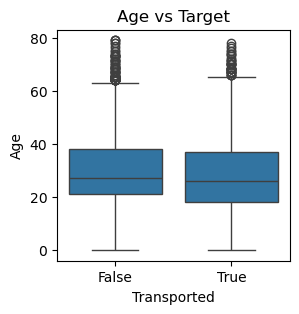

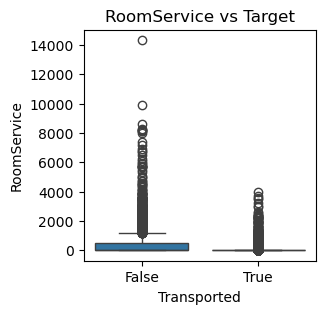

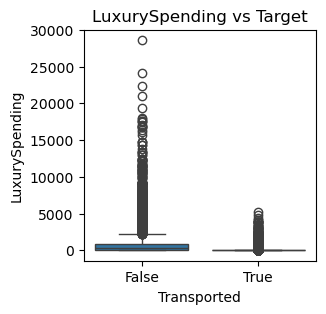

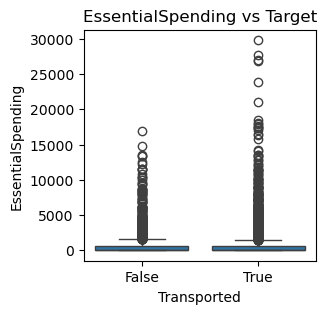

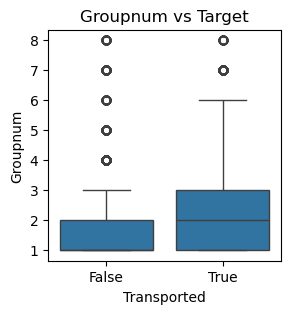

In [24]:
num_features = train.select_dtypes(include=['number']).columns.tolist()


for col in num_features:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x=train['Transported'], y=train[col])
    plt.title(f"{col} vs Target")
    plt.show()

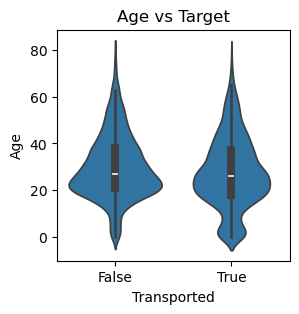

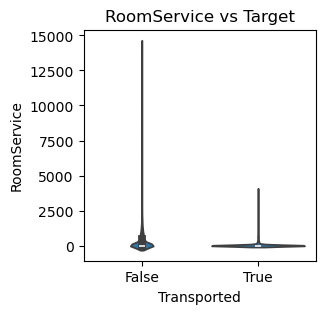

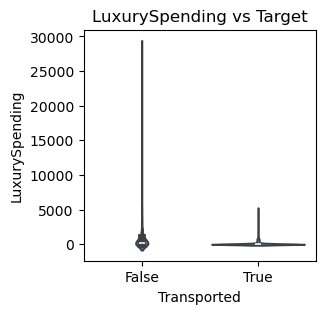

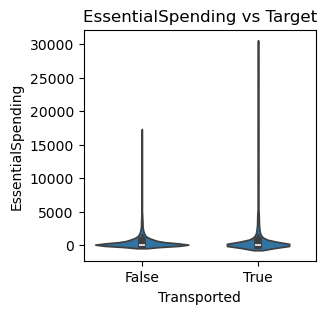

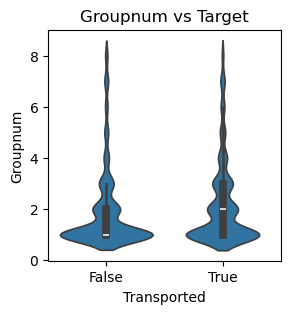

In [28]:
for col in num_features:
    plt.figure(figsize=(3, 3))
    sns.violinplot(x=train['Transported'], y=train[col])
    plt.title(f"{col} vs Target")
    plt.show()

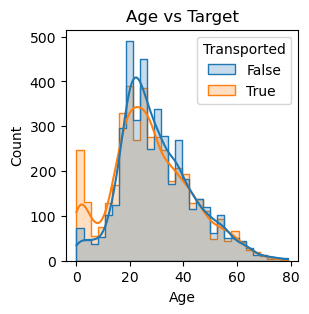

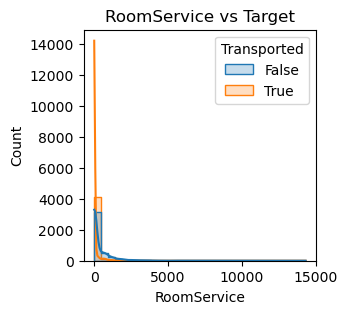

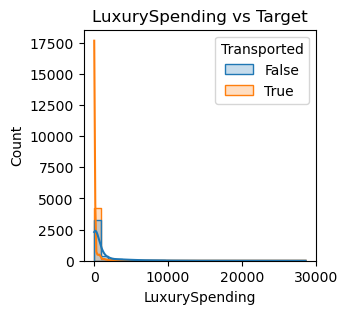

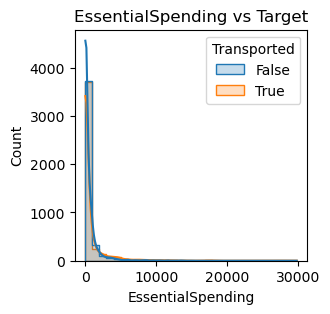

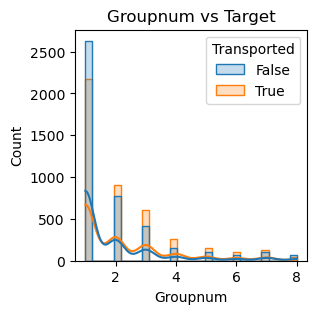

In [27]:
for col in num_features:
    plt.figure(figsize=(3, 3))
    sns.histplot(train, x=col, hue='Transported', kde=True, bins=30, element='step')
    plt.title(f"{col} vs Target")
    plt.show()

In [32]:
cat_features = train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features.remove('Group')

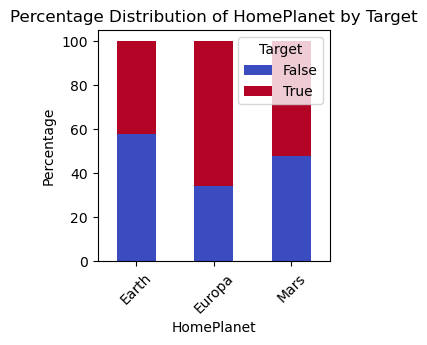

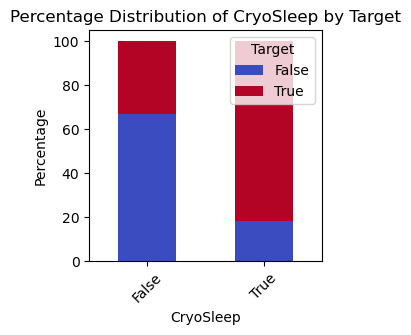

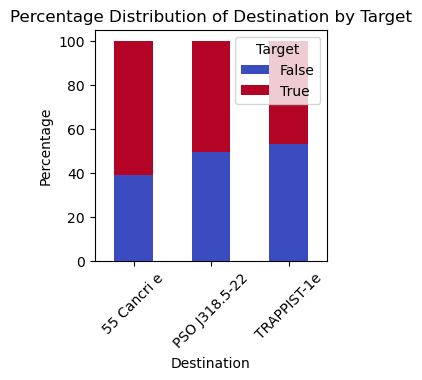

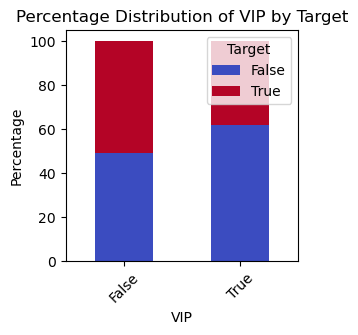

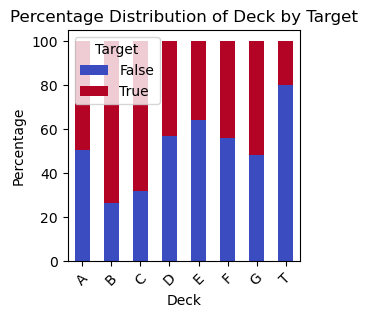

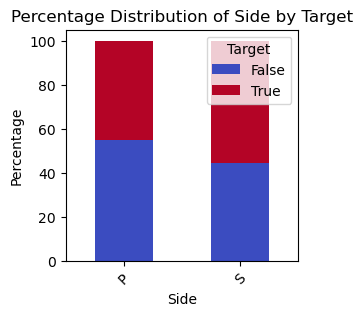

In [37]:
for col in cat_features:
    crosstab = pd.crosstab(train[col], train['Transported'], normalize='index') * 100  # Normalize to get percentages
    crosstab.plot(kind='bar', stacked=True, figsize=(3, 3), colormap='coolwarm')
    plt.title(f"Percentage Distribution of {col} by Target")
    plt.ylabel("Percentage")
    plt.legend(title='Target')
    plt.xticks(rotation=45)
    plt.show()

In [36]:
from scipy.stats import f_oneway

for col in cat_features:
    groups = [train[train[col] == category]['Transported'] for category in train[col].dropna().unique()]
    
    f_stat, p_value = f_oneway(*groups)
    print(f"{col}: F-statistic = {f_stat:.4f}, p-value = {p_value:.8f}")


HomePlanet: F-statistic = 168.8536, p-value = 0.00000000
CryoSleep: F-statistic = 2384.9238, p-value = 0.00000000
Destination: F-statistic = 53.8505, p-value = 0.00000000
VIP: F-statistic = 12.0488, p-value = 0.00052083
Deck: F-statistic = 58.6993, p-value = 0.00000000
Side: F-statistic = 92.4483, p-value = 0.00000000


In [38]:
train.drop(columns = 'Group',inplace = True)
test.drop(columns = 'Group',inplace = True)

In [40]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'Transported', 'Deck', 'Side', 'LuxurySpending', 'EssentialSpending',
       'Groupnum'],
      dtype='object')

In [41]:
test.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'Deck', 'Side', 'LuxurySpending', 'EssentialSpending', 'Groupnum'],
      dtype='object')

In [45]:
train[train.select_dtypes(include=['object']).columns] = train.select_dtypes(include=['object']).astype('category')
test[test.select_dtypes(include=['object']).columns] = test.select_dtypes(include=['object']).astype('category')

In [46]:
import xgboost as xgb
import pandas as pd

# Train XGBoost model
model = xgb.XGBClassifier(enable_categorical = True)
model.fit(train.drop(columns = 'Transported'), train['Transported'])

# Get feature importance
importance_df = pd.DataFrame({'Feature': train.drop(columns = 'Transported').columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


              Feature  Importance
1           CryoSleep    0.703648
6                Deck    0.050906
0          HomePlanet    0.048824
8      LuxurySpending    0.041659
5         RoomService    0.035283
9   EssentialSpending    0.028655
7                Side    0.025825
2         Destination    0.020352
3                 Age    0.017798
4                 VIP    0.013534
10           Groupnum    0.013516


In [48]:
X = train.drop(columns = 'Transported')
y = train['Transported']

In [57]:
print(X[numeric_features + categorical_features].dtypes)

Age                   float64
RoomService           float64
LuxurySpending        float64
EssentialSpending     float64
Groupnum              float64
HomePlanet           category
CryoSleep            category
Destination          category
VIP                  category
Deck                 category
Side                 category
dtype: object


In [52]:
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'n_estimators': (100, 1000),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 10),
    'reg_alpha': (0, 10),
    'reg_lambda': (0, 10)
}

xgb = XGBClassifier(eval_metric='logloss',enable_categorical = True)

bayes_search = BayesSearchCV(
    estimator=xgb,
    search_spaces=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

bayes_search.fit(X, y)

print("Best Params:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)


Best Params: OrderedDict({'colsample_bytree': 0.9374831814602507, 'gamma': 2, 'learning_rate': 0.020309024889316605, 'max_depth': 9, 'n_estimators': 190, 'reg_alpha': 0, 'reg_lambda': 5, 'subsample': 0.7234436485330709})
Best Score: 0.8077753242310205
